A notebook to determine growth rates on constant-slope strings

In [1]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy import stats
from growthrates import *

# 1-Stair

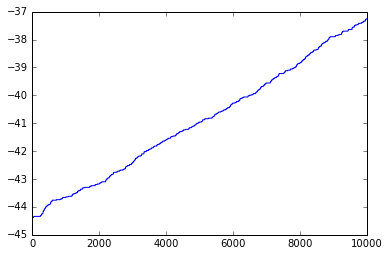

0.000714


In [2]:
N = 100
Steps = 10000
S = reset_S(N,-.9)
heights = np.array([np.mean(S)])
ts = np.arange(Steps+1)
for i in range(Steps):
    S = random_update_S(S)
    heights = np.append(heights, np.mean(S))
# print(np.shape(heights))
slope, intercept,_,_,_ = stats.linregress(ts[2000:],heights[2000:])

plt.plot(np.arange(Steps+1), heights)
plt.show()
print((heights[-1] - heights[0]) / Steps)

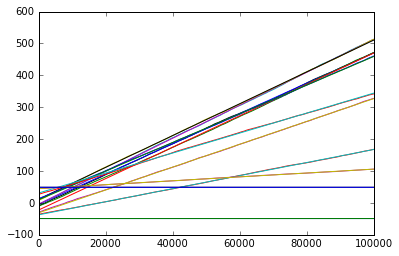

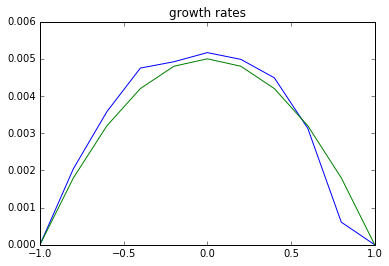

In [3]:
N = 100
Steps = 100000
slopes = np.array([])
ts = np.arange(Steps+1)

for m in range(-10,12,2):
    S = reset_S(N, m/10)
    heights = np.array([np.mean(S[:-1])])
    for i in range(Steps):
        S = random_update_S(S)
        heights = np.append(heights, np.mean(S[:-1]))
        
    plt.plot(ts, heights)
    slope, intercept,_,_,_ = stats.linregress(ts[20000:],
                                              heights[20000:])
    plt.plot(ts, slope * ts + intercept)
    slopes = np.append(slopes, slope)
plt.show()

# Growth Rate
plt.plot(np.arange(-1,1.2,.2), slopes)
plt.plot(np.arange(-1,1.2,.2), (1-np.arange(-1,1.2,.2)*np.arange(
    -1,1.2,.2))/(2*N))
plt.title("growth rates")
plt.show()

0.000498137358277


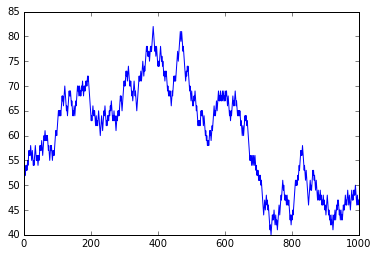

In [4]:
N = 1000
Steps = 100000
S = reset_S(N,0)
heights = np.array([np.mean(S)])
for i in range(Steps):
    S = random_update_S(S)
    heights = np.append(heights, np.mean(S))
ts = np.arange(Steps+1)
slope, intercept,_,_,_ = stats.linregress(ts[20000:],heights[20000:])
print(slope)

plt.plot(np.arange(N), S)
plt.show()

# 3-Stair

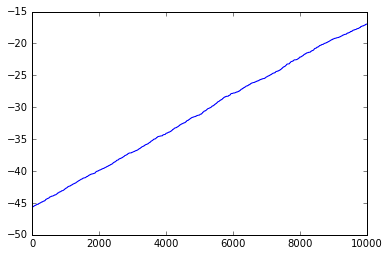

0.002872


In [5]:
N = 100
Steps = 10000
n = 3
S = reset_S(N,-.9)
heights = np.array([np.mean(S)])
ts = np.arange(Steps+1)
for i in range(Steps):
    S = stair_update_S(S,n)
    heights = np.append(heights, np.mean(S))
# print(np.shape(heights))
slope, intercept,_,_,_ = stats.linregress(ts[2000:],heights[2000:])

plt.plot(np.arange(Steps+1), heights)
plt.show()
print((heights[-1] - heights[0]) / Steps)

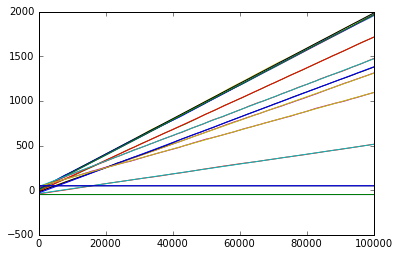

[ 0.          0.00550313  0.01320972  0.01412034  0.01723268  0.01953743
  0.01972912  0.01960625  0.01429729  0.01053205  0.        ]
[  0.00000000e+00   5.77800000e-03   1.10080000e-02   1.54980000e-02
   1.90080000e-02   2.12500000e-02   2.18880000e-02   2.05380000e-02
   1.67680000e-02   1.00980000e-02   2.66453526e-17]


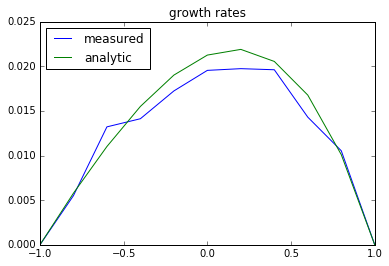

In [6]:
N = 100
Steps = 100000
n = 3
slopes3 = np.array([])
ts = np.arange(Steps+1)

for m in range(-10,12,2):
    S = reset_S(N, m/10)
    heights = np.array([np.mean(S[:-1])])
    for i in range(Steps):
        S = stair_update_S(S, n)
        heights = np.append(heights, np.mean(S[:-1]))
        
    plt.plot(ts, heights)
    slope, intercept,_,_,_ = stats.linregress(ts[20000:],
                                              heights[20000:])
    plt.plot(ts, slope * ts + intercept)
    slopes3 = np.append(slopes3, slope)
plt.show()

# Growth Rate
ms = np.arange(-1,1.2,.2)
aslopes3 = (1-ms*ms)*(17+6*ms+ms*ms)/(8*N)
print(slopes3)
print(aslopes3)
plt.plot(ms,  slopes3, label="measured")
plt.plot(ms, aslopes3, label="analytic")
plt.title("growth rates")
plt.legend(loc=2)
plt.savefig("../figures/growthrates/3stairRates.pdf")
plt.show()

# 1-Stair

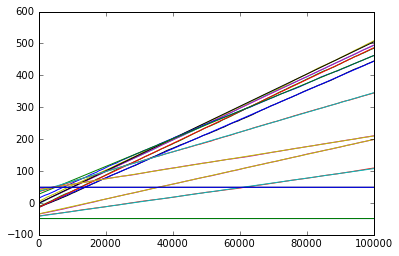

[ 0.          0.00149279  0.00233263  0.00456789  0.00500216  0.00495653
  0.00505542  0.00434409  0.00308688  0.0016828   0.        ]
[  0.00000000e+00   1.80000000e-03   3.20000000e-03   4.20000000e-03
   4.80000000e-03   5.00000000e-03   4.80000000e-03   4.20000000e-03
   3.20000000e-03   1.80000000e-03   4.44089210e-18]


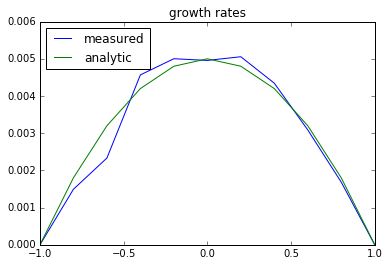

In [7]:
N = 100
Steps = 100000
n = 1
slopes1 = np.array([])
ts = np.arange(Steps+1)

for m in range(-10,12,2):
    S = reset_S(N, m/10)
    heights = np.array([np.mean(S[:-1])])
    for i in range(Steps):
        S = stair_update_S(S, n)
        heights = np.append(heights, np.mean(S[:-1]))
        
    plt.plot(ts, heights)
    slope, intercept,_,_,_ = stats.linregress(ts[20000:],
                                              heights[20000:])
    plt.plot(ts, slope * ts + intercept)
    slopes1 = np.append(slopes1, slope)
plt.show()

# Growth Rate
ms = np.arange(-1,1.2,.2)
aslopes1 = (1-ms*ms)/(2*N)
print(slopes1)
print(aslopes1)
plt.plot(ms,  slopes1, label="measured")
plt.plot(ms, aslopes1, label="analytic")
plt.title("growth rates")
plt.legend(loc=2)
plt.savefig("../figures/growthrates/1stairRates.pdf")
plt.show()

# 2-Stair

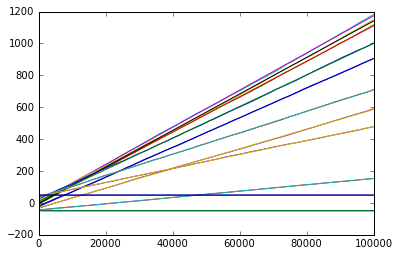

[ 0.          0.00199137  0.00616145  0.00929117  0.0111109   0.01164514
  0.01144007  0.0098864   0.00671689  0.00437381  0.        ]
[  0.00000000e+00   3.78000000e-03   7.04000000e-03   9.66000000e-03
   1.15200000e-02   1.25000000e-02   1.24800000e-02   1.13400000e-02
   8.96000000e-03   5.22000000e-03   1.33226763e-17]


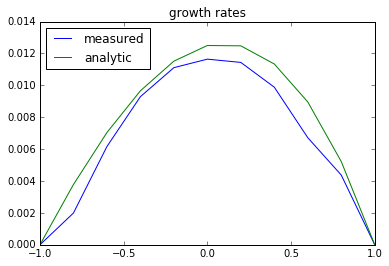

In [8]:
N = 100
Steps = 100000
n = 2
slopes2 = np.array([])
ts = np.arange(Steps+1)

for m in range(-10,12,2):
    S = reset_S(N, m/10)
    heights = np.array([np.mean(S[:-1])])
    for i in range(Steps):
        S = stair_update_S(S, n)
        heights = np.append(heights, np.mean(S[:-1]))
        
    plt.plot(ts, heights)
    slope, intercept,_,_,_ = stats.linregress(ts[int(Steps/5):],
                                              heights[int(Steps/5):])
    plt.plot(ts, slope * ts + intercept)
    slopes2 = np.append(slopes2, slope)
plt.show()

# Growth Rate
ms = np.arange(-1,1.2,.2)
aslopes2 = (1-ms*ms)*(5+ms)/(4*N)
print(slopes2)
print(aslopes2)
plt.plot(ms,  slopes2, label="measured")
plt.plot(ms, aslopes2, label="analytic")
plt.title("growth rates")
plt.legend(loc=2)
plt.savefig("../figures/growthrates/2stairRates.pdf")
plt.show()

/Users/cstahl/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app


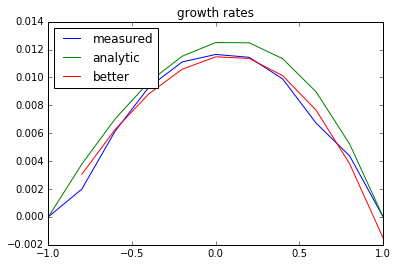

In [21]:
c = .1
better_aslopes2 = -((-1 + c + ms**2) * (c + (1 + ms) * (5 + ms)))/(4 * (1 + ms))/N
# better_aslopes2[0] = 0
plt.plot(ms,  slopes2, label="measured")
plt.plot(ms, aslopes2, label="analytic")
plt.plot(ms, better_aslopes2, label="better")
plt.title("growth rates")
plt.legend(loc=2)
# plt.savefig("../figures/growthrates/2stairRates.pdf")
plt.show()

# 4-Stair

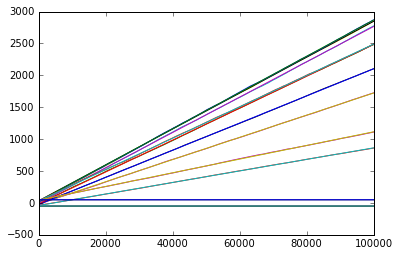

[ 0.          0.00904357  0.01739297  0.02128116  0.02499743  0.02768657
  0.02813238  0.02840386  0.0245736   0.01070819  0.        ]
[  0.00000000e+00   3.78000000e-03   7.04000000e-03   9.66000000e-03
   1.15200000e-02   1.25000000e-02   1.24800000e-02   1.13400000e-02
   8.96000000e-03   5.22000000e-03   1.33226763e-17]


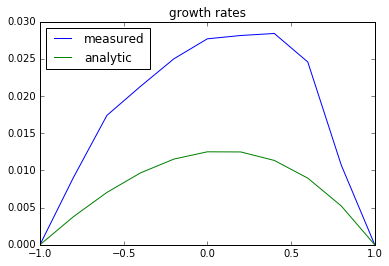

In [9]:
N = 100
Steps = 100000
n = 4
slopes4 = np.array([])
ts = np.arange(Steps+1)

for m in range(-10,12,2):
    S = reset_S(N, m/10)
    heights = np.array([np.mean(S[:-1])])
    for i in range(Steps):
        S = stair_update_S(S, n)
        heights = np.append(heights, np.mean(S[:-1]))
        
    plt.plot(ts, heights)
    slope, intercept,_,_,_ = stats.linregress(ts[int(Steps/5):],
                                              heights[int(Steps/5):])
    plt.plot(ts, slope * ts + intercept)
    slopes4 = np.append(slopes4, slope)
plt.show()

# Growth Rate
ms = np.arange(-1,1.2,.2)
aslopes4 = (1-ms*ms)*(5+ms)/(4*N)
print(slopes4)
print(aslopes4)
plt.plot(ms,  slopes4, label="measured")
plt.plot(ms, aslopes4, label="analytic")
plt.title("growth rates")
plt.legend(loc=2)
plt.savefig("../figures/growthrates/4stairRates.pdf")
plt.show()

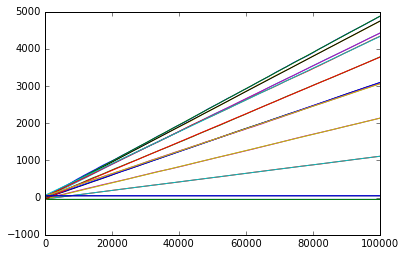

[ 0.          0.01147627  0.02173499  0.03097991  0.03803514  0.04406461
  0.0473412   0.04868412  0.04268589  0.03017461  0.        ]


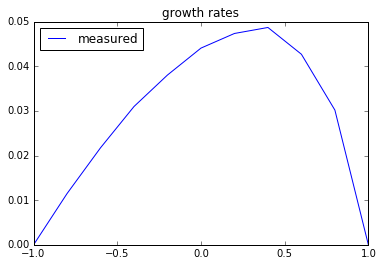

In [31]:
N = 100
Steps = 100000
n = 6
slopes6 = np.array([])
ts = np.arange(Steps+1)

for m in range(-10,12,2):
    S = reset_S(N, m/10)
    heights = np.array([np.mean(S[:-1])])
    for i in range(Steps):
        S = stair_update_S(S, n)
        heights = np.append(heights, np.mean(S[:-1]))
        
    plt.plot(ts, heights)
    slope, intercept,_,_,_ = stats.linregress(ts[int(Steps/5):],
                                              heights[int(Steps/5):])
    plt.plot(ts, slope * ts + intercept)
    slopes6 = np.append(slopes6, slope)
plt.show()

# Growth Rate
ms = np.arange(-1,1.2,.2)
aslopes6 = (6 + 6*ms - (1 + ms)**2/2. - (1 + ms)**3/4. - (1 + ms)**4/8. - 
            (1 + ms)**5/16. - (1 + ms)**6/32. - (1 + ms)**7/64.)/6.
print(slopes6)
# print(aslopes6)
plt.plot(ms,  slopes6, label="measured")
# plt.plot(ms, aslopes6, label="analytic")
plt.title("growth rates")
plt.legend(loc=2)
plt.savefig("../figures/growthrates/6stairRates.pdf")
plt.show()

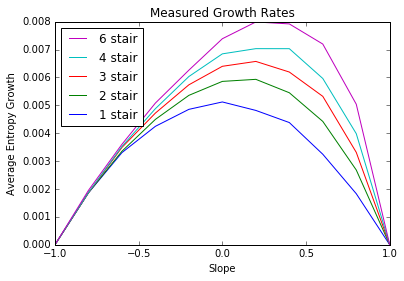

In [28]:
a, = plt.plot(ms,  slopes1, label="1 stair")
b, = plt.plot(ms,  slopes2/2, label="2 stair")
c, = plt.plot(ms,  slopes3/3, label="3 stair")
d, = plt.plot(ms,  slopes4/4, label="4 stair")
e, = plt.plot(ms,  slopes6/6, label="6 stair")
plt.ylabel("Average Entropy Growth")
plt.xlabel("Slope")
plt.title("Measured Growth Rates")
# handles, labels = plt.get_a.get_legend_handles_labels()
plt.legend([e, d, c, b, a], ["6 stair", "4 stair", "3 stair", 
                             "2 stair", "1 stair"], loc=2)
plt.savefig("../figures/growthrates/compareRates.pdf")
plt.show()

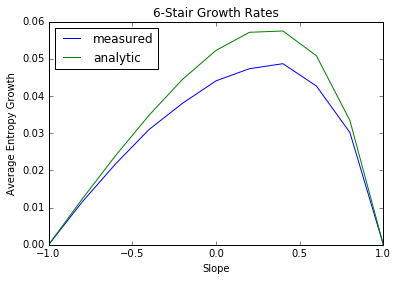

In [44]:
plt.plot(ms,  slopes6, label="measured")
plt.plot(ms, aslopes6/16, label="analytic")
plt.ylabel("Average Entropy Growth")
plt.xlabel("Slope")
plt.title("6-Stair Growth Rates")
plt.legend(loc=2)
plt.savefig("../figures/growthrates/6stairRates.pdf")
plt.show()

In [30]:
3**3/4

6.75